In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# create training and test datasets

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [2]:
# standardize the datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
X_combine_std = np.vstack((X_train_std, X_test_std))
y_combine_std = np.hstack((y_train, y_test))

In [7]:
X_combine_std

array([[-1.33269725, -1.30728421],
       [-1.16537974, -1.30728421],
       [ 0.84243039,  1.44587881],
       [ 1.0655204 ,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.0097479 ,  1.57698181],
       [ 1.56747294,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.12129291,  0.5281578 ],
       [ 0.45202286,  0.1348488 ],
       [-0.27301968, -0.2584602 ],
       [ 0.06161534,  0.2659518 ],
       [-1.38846976, -1.30728421],
       [ 0.50779537,  0.0037458 ],
       [ 0.11738784,  0.1348488 ],
       [ 0.73088538,  0.92146681],
       [-1.05383474, -1.30728421],
       [-0.16147468, -0.2584602 ],
       [ 0.06161534,  0.0037458 ],
       [-1.22115225, -1.30728421],
       [ 0.56356787,  0.79036381],
       [ 1.73479045,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.39625036,  0.1348488 ],
       [ 0.00584283, -0.1273572 ],
       [ 1.0097479 ,  1.57698181],
       [ 0.50779537,  0.2659518 ],
       [ 1.0097479 ,  0.2659518 ],
       [ 1.12129291,

In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, test_idx = None, resolution = 0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[ y == cl, 0],
                    y = X[ y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
        
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c = '', edgecolor = 'black', alpha = 1.0,
                    linewidth=1, marker ='o', s=100, label = 'test set')

In [9]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

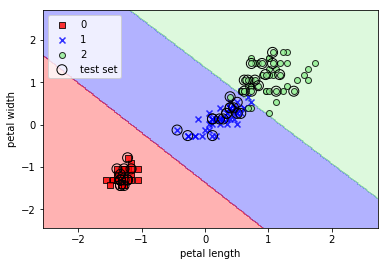

In [12]:
plot_decision_region(X_combine_std,
                     y_combine_std,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

If our datasets are too large to fit into our computer memory, we can use the partial_fit method which is stochastic gradient algorithm.


In [14]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss= 'hinge')

In [17]:
svm.partial_fit(X_train_std, y_train, classes = np.unique(y))

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
svm.predict(X_test_std)

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

Kernel SVM for datasets that are linearly inseparable.

In [19]:
#create a new dataset that cannot be linearly separated.

np.random.seed(1)
X_xor = np.random.randn(200, 2)
X_xor

array([[ 1.62434536e+00, -6.11756414e-01],
       [-5.28171752e-01, -1.07296862e+00],
       [ 8.65407629e-01, -2.30153870e+00],
       [ 1.74481176e+00, -7.61206901e-01],
       [ 3.19039096e-01, -2.49370375e-01],
       [ 1.46210794e+00, -2.06014071e+00],
       [-3.22417204e-01, -3.84054355e-01],
       [ 1.13376944e+00, -1.09989127e+00],
       [-1.72428208e-01, -8.77858418e-01],
       [ 4.22137467e-02,  5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00],
       [ 9.01590721e-01,  5.02494339e-01],
       [ 9.00855949e-01, -6.83727859e-01],
       [-1.22890226e-01, -9.35769434e-01],
       [-2.67888080e-01,  5.30355467e-01],
       [-6.91660752e-01, -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01],
       [-6.71246131e-01, -1.26645989e-02],
       [-1.11731035e+00,  2.34415698e-01],
       [ 1.65980218e+00,  7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01],
       [-7.47158294e-01,  1.69245460e+00],
       [ 5.08077548e-02, -6.36995647e-01],
       [ 1.

In [20]:
type(X_xor)

numpy.ndarray

In [24]:
X_xor[: ,0]

array([ 1.62434536e+00, -5.28171752e-01,  8.65407629e-01,  1.74481176e+00,
        3.19039096e-01,  1.46210794e+00, -3.22417204e-01,  1.13376944e+00,
       -1.72428208e-01,  4.22137467e-02, -1.10061918e+00,  9.01590721e-01,
        9.00855949e-01, -1.22890226e-01, -2.67888080e-01, -6.91660752e-01,
       -6.87172700e-01, -6.71246131e-01, -1.11731035e+00,  1.65980218e+00,
       -1.91835552e-01, -7.47158294e-01,  5.08077548e-02,  1.90915485e-01,
        1.20158952e-01,  3.00170320e-01, -1.14251820e+00, -2.08894233e-01,
        8.38983414e-01,  2.85587325e-01, -7.54397941e-01,  5.12929820e-01,
        4.88518147e-01,  1.13162939e+00,  2.18557541e+00, -1.44411381e+00,
        1.60037069e-01,  3.15634947e-01, -3.06204013e-01,  2.30094735e-01,
       -2.22328143e-01,  1.86561391e-01,  1.98299720e-01, -6.70662286e-01,
        1.21821271e-01,  1.19891788e+00, -3.75284950e-01,  4.23494354e-01,
       -3.43853676e-01, -6.20000844e-01, -4.47128565e-01,  4.03491642e-01,
       -1.09491185e+00,  

In [25]:
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor

array([ True, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True,

In [29]:
np.size(y_xor)

200

In [26]:
y_xor = np.where(y_xor, 1, -1)
y_xor

array([ 1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1])

In [28]:
X_xor[y_xor == 1, 0]

array([ 1.62434536,  0.86540763,  1.74481176,  0.3190391 ,  1.46210794,
        1.13376944, -1.10061918,  0.90085595, -0.26788808, -1.11731035,
       -0.74715829,  0.05080775,  0.30017032, -0.20889423, -0.75439794,
        0.51292982,  0.48851815,  2.18557541,  0.31563495, -0.30620401,
       -0.67066229, -0.34385368, -0.62000084, -0.44712856, -1.09491185,
        0.74055645, -0.26621851, -1.37311732,  0.84616065,  0.35054598,
       -1.85798186, -1.19926803, -1.23005814,  0.79280687,  0.52057634,
        0.44136444,  0.01740941,  0.24879916,  0.49521132,  2.19069973,
       -0.64691669,  2.52832571,  0.04366899,  1.33145711,  0.68006984,
       -1.27255876,  0.28066508,  0.6590498 , -0.40087819, -0.56230543,
       -1.1191154 ,  1.11438298, -1.23685338,  0.62336218, -1.2197444 ,
       -1.67419581, -0.86131636,  0.61853913,  1.81053491, -2.793085  ,
        0.36633201,  0.42952614,  0.10622272,  0.79502609,  0.2764993 ,
       -1.44087602, -0.25417987, -1.11647002,  0.49233656, -0.95

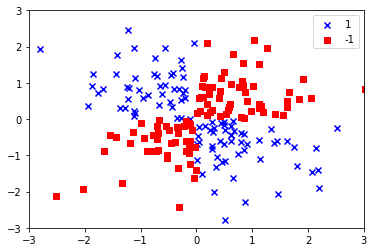

In [32]:
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c = 'b',
            marker = 'x',
            label = '1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c = 'r',
            marker = 's',
            label = '-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = 'best')
plt.show()

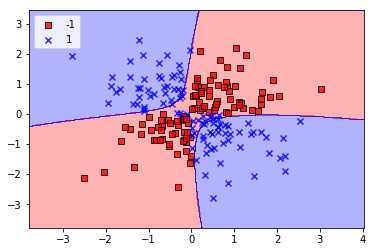

In [34]:
svm_k = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm_k.fit(X_xor, y_xor)
plot_decision_region(X_xor, y_xor, classifier=svm_k)
plt.legend(loc = 'upper left')
plt.show()

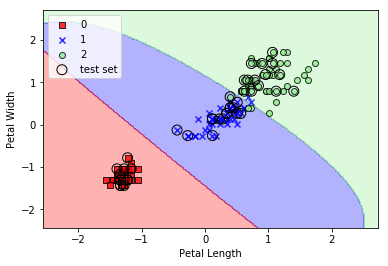

In [37]:
svm_iris = SVC(kernel = 'rbf', random_state=1, gamma=0.2, C=1.0)
svm_iris.fit(X_train_std, y_train)
plot_decision_region(X_combine_std,
                     y_combine_std,
                     classifier=svm_iris,
                     test_idx=range(105, 150))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.show()

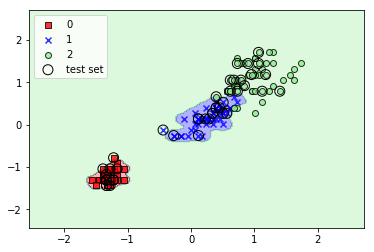

In [39]:
## large gamma
svm_iris2 = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm_iris2.fit(X_train_std, y_train)
plot_decision_region(X_combine_std,
                     y_combine_std,
                     classifier=svm_iris2,
                     test_idx=range(105,150))
plt.legend()
plt.show()